In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pedro2/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
torch.cuda.set_device(1)

In [5]:
PATH = 'words/'
csv_path = PATH + 'csv_files/c03.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

4366

In [6]:

arch = vgg16
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [7]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 122.5, 97.5, -0.5)

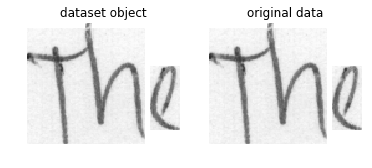

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [9]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/c03-000a-00-00.png']

In [10]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [11]:
learn = ConvLearner.pretrained(arch, data)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/pedro2/.torch/models/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [58:58<00:00, 156432.96it/s]  


 91%|█████████ | 50/55 [00:42<00:04,  1.18it/s, loss=10.8]

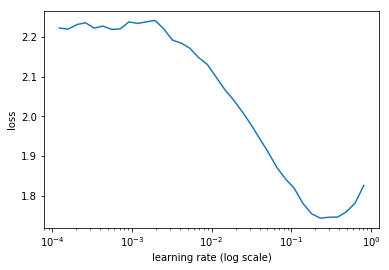

In [12]:
lrf=learn.lr_find()
learn.sched.plot()

In [13]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.046706   0.703074   0.753723  
    1      0.808342   0.503077   0.822451                  
    2      0.660043   0.492277   0.823597                  
    3      0.636572   0.453283   0.841924                  
    4      0.602143   0.417904   0.853379                  
    5      0.531164   0.40012    0.865979                  
    6      0.50036    0.400717   0.864834                  


[array([0.40072]), 0.8648339059344682]

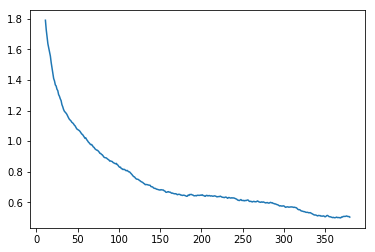

In [14]:
learn.sched.plot_loss()

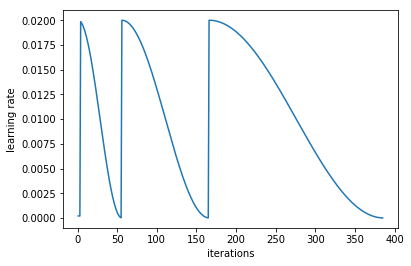

In [15]:
learn.sched.plot_lr()

In [16]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.372154   0.175935   0.941581  
    1      0.244586   0.156711   0.945017                  
    2      0.174094   0.101016   0.966781                  
    3      0.146769   0.127513   0.950745                  
    4      0.12571    0.081622   0.967927                  
    5      0.096912   0.067958   0.973654                   
    6      0.077244   0.062019   0.973654                   


[array([0.06202]), 0.9736540675299821]

In [17]:
learn.save(f'{sz}')

In [18]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [19]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [20]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 93%|█████████▎| 51/55 [00:20<00:01,  2.48it/s, loss=18.9]

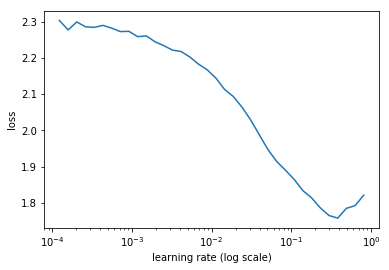

In [21]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [22]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.057567   0.694436   0.773196  
    1      0.806723   0.505015   0.814433                  
    2      0.685508   0.484551   0.822451                  
    3      0.637603   0.450775   0.848797                  
    4      0.598706   0.429119   0.852234                  
    5      0.563478   0.414423   0.852234                  
    6      0.522456   0.404295   0.857961                  


[array([0.40429]), 0.8579610537007912]

In [23]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.39842    0.192923   0.934708  
    1      0.241758   0.136639   0.95189                   
    2      0.164006   0.091599   0.969072                  
    3      0.167115   0.166284   0.940435                  
    4      0.127005   0.092434   0.963345                  
    5      0.10927    0.0818     0.970218                  
    6      0.083356   0.07509    0.973654                   


[array([0.07509]), 0.9736540664375716]

In [24]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [25]:
accuracy_np(preds, y)

0.9805269186712485

In [26]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [27]:
accuracy_np(preds,y)

0.9725085910652921